<a href="https://colab.research.google.com/github/francji1/01ZLMA/blob/main/code/01ZLMA_ex05_GLM_Model_Diagnostics_student_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01ZLMA - Exercise 05

Exercise 05 of the course 01ZLMA.

# Model Diagnostics - Post-hoc analysis of glm

How to check if our GLM is sufficient and how to do it in Python/ R




## Dataset trees

The volume y (in cubic feet) of 31 black cherry trees (střemcha pozdní) was measured as well as the height (in feet) and the girth, or diameter,
at breast height (in inches). The volume of the tree is related to the volume of timber, which is important economically.

More information can be find in Chapter 8: Generalized Linear Models: Diagnostics (Peter K. Dunn and Gordon K. Smyth, Generalized Linear Models With Examples in R)


In [78]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats



In [79]:
# Load the R magic extension
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [80]:
%%R -o trees
trees

   Girth Height Volume
1    8.3     70   10.3
2    8.6     65   10.3
3    8.8     63   10.2
4   10.5     72   16.4
5   10.7     81   18.8
6   10.8     83   19.7
7   11.0     66   15.6
8   11.0     75   18.2
9   11.1     80   22.6
10  11.2     75   19.9
11  11.3     79   24.2
12  11.4     76   21.0
13  11.4     76   21.4
14  11.7     69   21.3
15  12.0     75   19.1
16  12.9     74   22.2
17  12.9     85   33.8
18  13.3     86   27.4
19  13.7     71   25.7
20  13.8     64   24.9
21  14.0     78   34.5
22  14.2     80   31.7
23  14.5     74   36.3
24  16.0     72   38.3
25  16.3     77   42.6
26  17.3     81   55.4
27  17.5     82   55.7
28  17.9     80   58.3
29  18.0     80   51.5
30  18.0     80   51.0
31  20.6     87   77.0


# Your Turn

## Analyse data of car accidents in Sweeden.

## Your Turn: HW 05

Problem 8.6. from the book:


The standardized deviance residual $r^{DS}$ is approximately the reduction
in the residual deviance when Observation $i$ is omitted from the data. Demonstrate this by R code using the $trees$ data as follows.

* Fit the model m_1 as

  `data(trees)`
   `model_full <- glm( Volume ~ log(Girth) + log(Height),family=Gamma(link=log), data=trees)`
 Compute the residual deviance, the Pearson estimate of $\phi$, and the standardized deviance residuals from this model.

* Omit Observation 1 from `trees`, and refit the model. Call this model
`model_omit_1`.

* Compute the difference between the residual deviance for the full model
`model_full` and for model `model_omit_1`. Show that this differences divided by the Pearson estimate of $\phi$ is approximately the standardized
deviance residuals squared.

* Repeat the above process for every observation $i$. At each iteration, call this model `model_omit_i`. Then, compute the difference between the deviance for the full model `model_full` and for model `model_omit_i`. Show that these differences divided by $\phi$ are approximately the standardized residuals squared.


In [81]:
%%R
data(trees)
model_full <- glm(Volume ~ log(Girth) + log(Height), family = Gamma(link = "log"), data = trees)

In [82]:
%%R
# Compute residual deviance for the full model
deviance_full <- deviance(model_full)

# Estimate Pearson's ϕ
phi_estimate <- sum(residuals(model_full, type = "pearson")^2) / model_full$df.residual

# Compute standardized deviance residuals
std_dev_residuals <- residuals(model_full, type = "deviance") / sqrt(phi_estimate)

# Print initial model statistics
cat("Full Model Deviance:", deviance_full, "\n")
cat("Estimated ϕ:", phi_estimate, "\n")
cat("Standardized Deviance Residuals (First 5):", head(std_dev_residuals, 5), "\n")

# Omit observation 1 from the dataset
trees_omit_1 <- trees[-1, ]

# Refit the model without the first observation
model_omit_1 <- glm(Volume ~ log(Girth) + log(Height), family = Gamma(link = "log"), data = trees_omit_1)

# Compute residual deviance for the model with omitted first observation
deviance_omit_1 <- deviance(model_omit_1)

# Difference in deviance
deviance_difference <- deviance_full - deviance_omit_1

# Calculate the square of the first standardized deviance residual
std_dev_resid_square <- std_dev_residuals[1]^2

# Compare the calculated values
cat("Difference in Deviance:", deviance_difference, "\n")
cat("First Standardized Deviance Residual Squared:", std_dev_resid_square, "\n")
cat("Difference/ϕ:", deviance_difference / phi_estimate, "\n")
cat("Check Approximation (Diff/ϕ vs. Std Residual^2):",
    abs((deviance_difference / phi_estimate) - std_dev_resid_square), "\n")


Full Model Deviance: 0.1835153 
Estimated ϕ: 0.006427286 
Standardized Deviance Residuals (First 5): 0.2398522 0.411441 0.1615728 -0.1648236 -0.5874515 
Difference in Deviance: 0.0004362007 
First Standardized Deviance Residual Squared: 0.05752907 
Difference/ϕ: 0.06786702 
Check Approximation (Diff/ϕ vs. Std Residual^2): 0.01033795 


In [83]:
%%R
deviance_diff <- numeric(nrow(trees))
residuals_squared <- numeric(nrow(trees))

for (i in 1:nrow(trees)) {
  # Omit observation i
  data_omit <- trees[-i,]

  # Refit the model
  model_omit <- glm(Volume ~ log(Girth) + log(Height), family = Gamma(link = "log"), data = data_omit)

  # Compute new deviance
  deviance_omit <- deviance(model_omit)

  # Difference in deviance
  deviance_diff[i] <- deviance_full - deviance_omit

  # Approximate the squared standardized residuals
  residuals_squared[i] <- std_dev_residuals[i]^2
}

# Compare the results
result_comparison <- data.frame(Observation = 1:nrow(trees),
                                Deviance_Difference = deviance_diff,
                                Residuals_Squared = residuals_squared,
                                Difference_by_phi = deviance_diff / phi_estimate,
                                Check_Approximation = abs((deviance_diff / phi_estimate) - residuals_squared))

print(result_comparison)

   Observation Deviance_Difference Residuals_Squared Difference_by_phi
1            1        4.362007e-04      5.752907e-02      6.786702e-02
2            2        1.311328e-03      1.692837e-01      2.040252e-01
3            3        2.094472e-04      2.610577e-02      3.258720e-02
4            4        1.853800e-04      2.716682e-02      2.884265e-02
5            5        2.514172e-03      3.450993e-01      3.911717e-01
6            6        2.526090e-03      3.349793e-01      3.930259e-01
7            7        3.579434e-03      4.927456e-01      5.569121e-01
8            8        2.333127e-03      3.452325e-01      3.630035e-01
9            9        6.909102e-03      9.720317e-01      1.074964e+00
10          10        3.957066e-05      5.870003e-03      6.156668e-03
11          11        1.777514e-02      2.548073e+00      2.765574e+00
12          12        1.027522e-04      1.524094e-02      1.598688e-02
13          13        8.759012e-04      1.298394e-01      1.362785e-01
14    

In [84]:
%%R
model_full <- glm( Volume ~ log(Girth) + log(Height),family=Gamma(link=log), data=trees)
summary(model_full)
# Deviance residuals (default)
resid(model_full)
# Standardized deviance residuals
rstandard(model_full)
# Pearsons estiamtes of phi
phi_est = summary(model_full)$dispersion
cat("Pearsons estiamtes of phi: ", phi_est, ".\n")
# Omitting the first observation
trees1 = trees[-1,]

model_omit_1 = glm( Volume ~ log(Girth) + log(Height),family=Gamma(link=log), data=trees1)
summary(model_omit_1)

# Residual deviances
# Compute the difference between the residual deviance for the full model model_full and for model model_omit_1.
cat("Residual deviance of the full model: ", model_full$null.deviance - model_full$deviance, ".\n")
cat("Residual deviance of the model with the first observation omitted: ", model_omit_1$null.deviance - model_omit_1$deviance, ".\n")


Pearsons estiamtes of phi:  0.006427286 .
Residual deviance of the full model:  8.133686 .
Residual deviance of the model with the first observation omitted:  7.287623 .


In [85]:
%%R

# Show that this differences divided by the Pearson estimate of ϕ is approximately the standardized deviance residuals squared.
# model_full
cat("Deviance divided by dispersion estimate: ", model_full$deviance/phi_est, ".\n")
cat("Sum of standardized deviance residuals squared: ", sum(rstandard(model_full)^2), ".\n")

# model_omit_1
cat("Deviance divided by despersion estimate: ", model_omit_1$deviance/(summary(model_omit_1)$dispersion), ".\n")
cat("Sum of standardized deviance residuals squared: ", sum(rstandard(model_omit_1)^2))


Deviance divided by dispersion estimate:  28.55253 .
Sum of standardized deviance residuals squared:  30.98245 .
Deviance divided by despersion estimate:  27.49823 .
Sum of standardized deviance residuals squared:  29.93437

$$
D=\sum_{i=1}^{n}(r_{i}^{D})^{2}
$$

$$
{r_{i}^{DS}=\frac{r_{i}^{D}}{\sqrt{\hat\phi(1-h_{ii})}}}
$$

In [86]:
%%R
# Repeat the above process for every observation i.
# (1) At each iteration, call this model model_omit_i.
# (2) Then, compute the difference between the deviance for the full model model_full and for model model_omit_i.
# (3) Show that these differences divided by ϕ are approximately the standardized residuals squared.

n = nrow(trees)

for (i in 1:n) {
  # (1)
  trees_i = trees[-i,]
  model_omit_i = glm( Volume ~ log(Girth) + log(Height),family=Gamma(link=log), data=trees_i)
  # (2)
  print(model_full$deviance - model_omit_i$deviance)
  # (3)
  print(model_omit_i$deviance/phi_est - sum(rstandard(model_omit_i)^2))
}

[1] 0.0004362007
[1] -1.449713
[1] 0.001311328
[1] -1.577955
[1] 0.0002094472
[1] -1.472988
[1] 0.00018538
[1] -1.413728
[1] 0.002514172
[1] -2.025634
[1] 0.00252609
[1] -2.084929
[1] 0.003579434
[1] -1.931105
[1] 0.002333127
[1] -1.842651
[1] 0.006909102
[1] -2.354429
[1] 3.957066e-05
[1] -1.36589
[1] 0.01777514
[1] -4.199946
[1] 0.0001027522
[1] -1.373758
[1] 0.0008759012
[1] -1.461466
[1] 0.007504959
[1] -2.578391
[1] 0.02872238
[1] -5.913973
[1] 0.02188563
[1] -4.876429
[1] 0.01552174
[1] -3.616727
[1] 0.03058669
[1] -5.93554
[1] 0.005889579
[1] -2.344805
[1] 1.577121e-05
[1] -1.586801
[1] 0.005225479
[1] -2.115813
[1] 0.005206203
[1] -2.386835
[1] 0.0135856
[1] -3.607533
[1] 6.340525e-07
[1] -1.410457
[1] 3.483604e-05
[1] -1.392833
[1] 0.007544795
[1] -2.43504
[1] 0.002860822
[1] -1.723154
[1] 0.007202775
[1] -2.378389
[1] 0.003375024
[1] -2.024212
[1] 0.004641733
[1] -2.226017
[1] 0.0002994453
[1] -1.583398


# Additional Turn

## Analyse data of car accidents in Sweden.

In [87]:
%%R
sweden2     <- "https://raw.githubusercontent.com/francji1/01ZLMA/main/data/sweden.csv"
cars_former <- read.table(sweden2, header = T, sep = ",")
summary(cars_former)
head(cars_former)

  Year Deaths Cars Fuel
1 1955    902  755 1531
2 1956    889  855 1657
3 1957    946  987 1738
4 1958    941 1098 1893
5 1959   1000 1216 2011
6 1960   1036 1324 2127


Dataset contains the number of deaths, the number of registered cars, the annual volume of sold fuels, the number of registered vehicles and the year. Our goal will be to create the best possible model for death rates. Since these are the number of events per unit time, we use the Poisson distribution with the *canonical link function*  $g (\mu) = log(\mu) $.

Because the observed period is relatively long and there have been significant changes in transport, we will only consider data from 1975.

In [88]:
%%R
row.names(cars) <- NULL
cars

   Year Deaths Cars Fuel
1  1975   1172 2931 4383
2  1976   1168 3060 4624
3  1977   1031 3039 4811
4  1978   1034 3042 4945
5  1979    928 3059 4913
6  1980    848 3077 4751
7  1981    784 3093 4679
8  1982    758 3143 4712
9  1983    779 3222 4834
10 1984    801 3305 5028
11 1985    808 3383 5067
12 1986    844 3497 5328
13 1987    787 3626 5534
14 1988    813 3764 5739
15 1989    904 3887 5910
16 1990    772 3925 5630
17 1991    745 3945 5751
18 1992    759 3906 5879
19 1993    632 3882 5590
20 1994    589 3912 5655
21 1995    572 3953 5761
22 1996    537 3981 5683
23 1997    541 4053 5577
24 1998    531 4145 5427
25 1999    580 4259 5464
26 2000    591 4388 5361
27 2001    583 4428 5422
28 2002    560 4468 5515
29 2003    529 4511 5547
30 2004    480 4570 5546
31 2005    440 4633 5506
32 2006    445 4701 5363
33 2007    471 4782 5253
34 2008    397 4809 4930
35 2009    358 4837 4845
36 2010    266 4884 4550


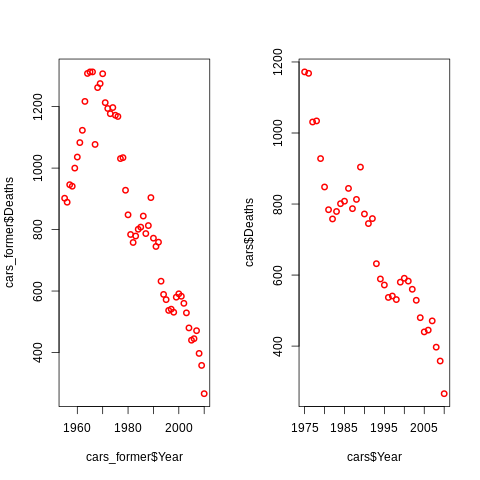

In [89]:
%%R
par(mfrow=c(1,2))
plot(cars_former$Deaths~cars_former$Year, col="red", lwd=2)
cars <- cars_former[cars_former$Year>1974,]
plot(cars$Deaths~cars$Year, col="red", lwd=2)

In [90]:
%%R
#detach(cars)
attach(cars)

In [91]:
%%R
ggpairs(cars)


Error in ggpairs(cars) : could not find function "ggpairs"


# Tasks

* Find the best posssible model. Try adding all variables up to the second order interactions. You can use `step()` function based on `AIC`.
* Analyse residuals and check systematic components.
* If incorrect linear predictor appears, try to transform corresponding variable. Hint: `Fuel_transformed <- log(abs(Fuel-mean(Fuel)))`
* Run post hoc analysis of your final model again
* Find influence observations and decide how to cope with them (if any)
* Hide last 5 observations, train the model using remaining and try to predict response for the 5 hidden latest observations. Plot predictiions together with true observations.


## Model Construction

In [92]:
%%R
# Full model
max_model = glm(Deaths ~ .^3, family=poisson, data=cars)

# Null model
min_model = glm(Deaths ~ 1, family=poisson, data=cars)

In [93]:
%%R
# Model Selection
auto.both = step(min_model, direction = "both", scope = list(lower = min_model, upper = max_model))

Start:  AIC=2775
Deaths ~ 1

       Df Deviance     AIC
+ Year  1   257.45  561.05
+ Cars  1   476.39  779.99
+ Fuel  1  2248.40 2552.00
<none>     2473.39 2775.00

Step:  AIC=561.05
Deaths ~ Year

       Df Deviance     AIC
+ Cars  1    99.58  405.19
+ Fuel  1   188.56  494.16
<none>      257.45  561.05
- Year  1  2473.39 2775.00

Step:  AIC=405.19
Deaths ~ Year + Cars

            Df Deviance    AIC
+ Fuel       1    81.90 389.51
+ Year:Cars  1    87.47 395.08
<none>            99.58 405.19
- Cars       1   257.45 561.05
- Year       1   476.39 779.99

Step:  AIC=389.51
Deaths ~ Year + Cars + Fuel

            Df Deviance    AIC
+ Year:Fuel  1    58.30 367.91
+ Cars:Fuel  1    59.92 369.52
<none>            81.90 389.51
+ Year:Cars  1    80.92 390.53
- Fuel       1    99.58 405.19
- Cars       1   188.56 494.16
- Year       1   398.14 703.74

Step:  AIC=367.91
Deaths ~ Year + Cars + Fuel + Year:Fuel

            Df Deviance    AIC
<none>           58.303 367.91
+ Year:Cars  1   58.15

In [94]:
%%R
final_model = glm(Deaths ~ Year + Cars + Fuel + Year:Fuel, family=poisson, data=cars)
summary(final_model)


Call:
glm(formula = Deaths ~ Year + Cars + Fuel + Year:Fuel, family = poisson, 
    data = cars)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.511e+02  2.162e+01  11.614  < 2e-16 ***
Year        -1.246e-01  1.092e-02 -11.408  < 2e-16 ***
Cars         7.577e-04  7.415e-05  10.219  < 2e-16 ***
Fuel        -1.942e-02  4.026e-03  -4.823 1.41e-06 ***
Year:Fuel    9.804e-06  2.025e-06   4.842 1.29e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2473.393  on 35  degrees of freedom
Residual deviance:   58.303  on 31  degrees of freedom
AIC: 367.91

Number of Fisher Scoring iterations: 3



## Analysing Residuals

Used to validate
* the chosen *link function* (utilizing the working responses)
* and the chosen *regressors* (using the Partial Residual Plots).  

In PRPs the standardized deviance residuals are used because of their approximately constant variance.

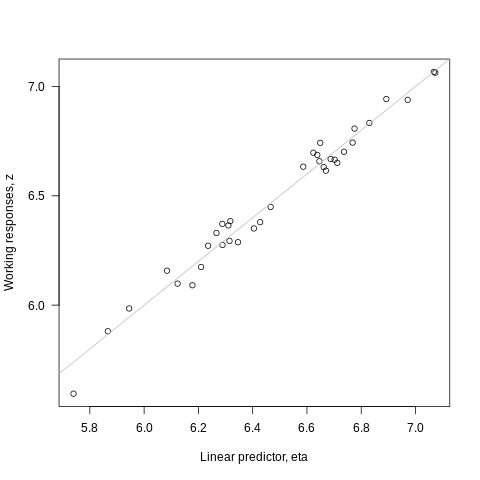

In [95]:
%%R
eta = final_model$linear.predictor
z   = resid(final_model, type="working") + eta
plot(z ~ eta, las=1,
        xlab="Linear predictor, eta", ylab="Working responses, z")
abline(0, 1, col="grey")

No trend can be observed from the working responses graph, meaning the data at hand can be properly described with the use of the canonical link function. Therefore no other link function needs to be considered.

In [96]:
%%R
cars_modeled = cars %>%
  mutate(fitted = final_model$fitted.values,
         r_deviance_std =rstandard(final_model, type = "deviance"),
         r_pearson_std = rstandard(final_model, type = "pearson") )
head(cars_modeled)

   Year Deaths Cars Fuel    fitted r_deviance_std r_pearson_std
21 1975   1172 2931 4383 1173.4163    -0.05622112    -0.0562098
22 1976   1168 3060 4624 1179.6107    -0.41134169    -0.4106652
23 1977   1031 3039 4811 1065.4772    -1.13769127    -1.1315052
24 1978   1034 3042 4945  984.9829     1.63544231     1.6488419
25 1979    928 3059 4913  925.1202     0.09961086     0.0996625
26 1980    848 3077 4751  869.6828    -0.78084246    -0.7775773


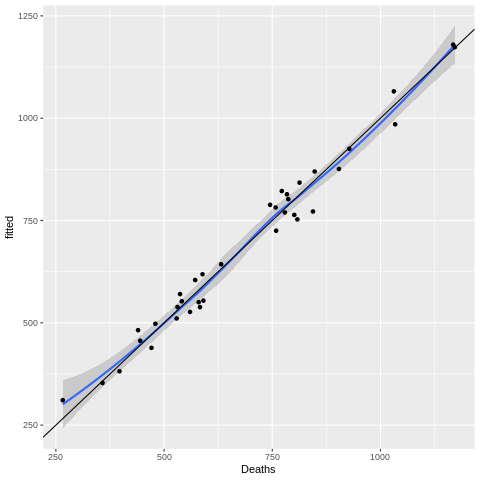

In [97]:
%%R
ggplot(cars_modeled, aes(x = Deaths, y = fitted)) +
  geom_smooth()+
  geom_point() +
  geom_abline(intercept = 0, slope = 1)

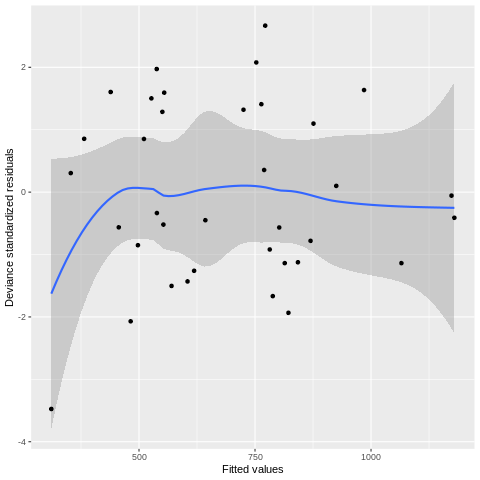

In [98]:
%%R
ggplot(cars_modeled, aes(x = fitted, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(x = "Fitted values",
       y = "Deviance standardized residuals")

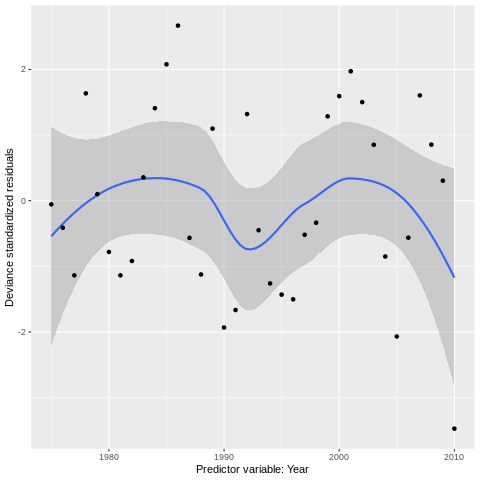

In [99]:
%%R
ggplot(cars_modeled, aes(x = Year, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(x = "Predictor variable: Year",
       y = "Deviance standardized residuals")

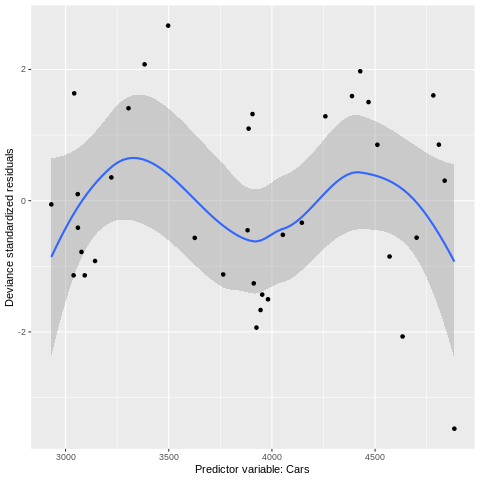

In [100]:
%%R
ggplot(cars_modeled, aes(x = Cars, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(x = "Predictor variable: Cars",
       y = "Deviance standardized residuals")

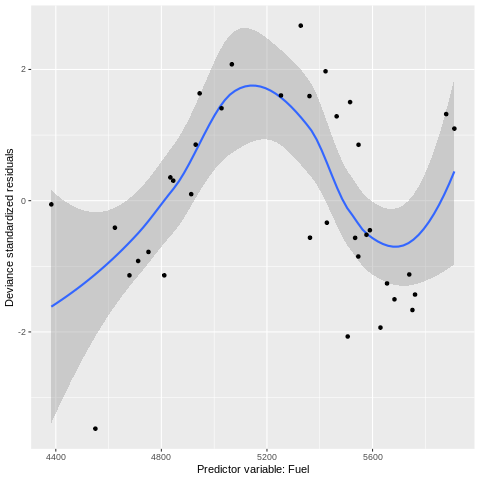

In [101]:
%%R
ggplot(cars_modeled, aes(x = Fuel, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(x = "Predictor variable: Fuel",
       y = "Deviance standardized residuals")

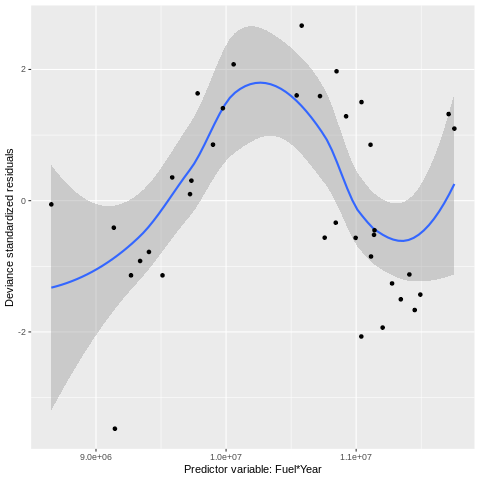

In [102]:
%%R
ggplot(cars_modeled, aes(x = Fuel*Year, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(x = "Predictor variable: Fuel*Year",
       y = "Deviance standardized residuals")

## Transforming the Problematic Regressors
The residuals in the last two plots of the previous section are not scattered evenly around zero. On the contrary, a visible crook can be seen in the centre of the graph.

This means that the relationship between the regressor `Fuel` and the dependent variable `Deaths` is not linear and needs to be transformed. For this purpose the transformation hinted on in the task of the assignment, i.e. `Fuel_transformed = log(abs(Fuel-mean(Fuel)))` will be used.

In [103]:
%%R
Fuel_transformed = log(abs(Fuel-mean(Fuel)))

transformed_model = glm(Deaths ~ Year + Cars + Fuel_transformed + Year:Fuel, family=poisson, data=cars)
summary(transformed_model)


Call:
glm(formula = Deaths ~ Year + Cars + Fuel_transformed + Year:Fuel, 
    family = poisson, data = cars)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       1.605e+02  8.317e+00  19.299  < 2e-16 ***
Year             -7.895e-02  4.301e-03 -18.356  < 2e-16 ***
Cars              7.962e-04  7.477e-05  10.649  < 2e-16 ***
Fuel_transformed -4.015e-02  9.476e-03  -4.237 2.26e-05 ***
Year:Fuel         3.843e-08  9.281e-09   4.141 3.46e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2473.393  on 35  degrees of freedom
Residual deviance:   64.045  on 31  degrees of freedom
AIC: 373.65

Number of Fisher Scoring iterations: 3



In [104]:
%%R
cars_modeled_new = cars %>%
  mutate(fitted = transformed_model$fitted.values,
         Fuel_transformed = log(abs(Fuel-mean(Fuel))),
         r_deviance_std =rstandard(transformed_model, type = "deviance"),
         r_pearson_std = rstandard(transformed_model, type = "pearson") )
head(cars_modeled_new)

   Year Deaths Cars Fuel    fitted Fuel_transformed r_deviance_std
21 1975   1172 2931 4383 1084.6691         6.781341      3.1094114
22 1976   1168 3060 4624 1146.0686         6.461859      0.7707496
23 1977   1031 3039 4811 1071.3565         6.116444     -1.3327438
24 1978   1034 3042 4945 1016.9527         5.765974      0.5647388
25 1979    928 3059 4913  946.7869         5.861498     -0.6444857
26 1980    848 3077 4751  863.5830         6.240763     -0.5632792
   r_pearson_std
21     3.1503275
22     0.7731962
23    -1.3242964
24     0.5663100
25    -0.6423436
26    -0.5615774


In [105]:
%%R
cars_modeled_new = cars_modeled_new %>%
mutate(Partial_for_Year = as.data.frame(resid(transformed_model, type="partial"))$Year,
        Partial_for_Fuel = as.data.frame(resid(transformed_model, type="partial"))$Fuel_transformed,
        Partial_for_Cars = as.data.frame(resid(transformed_model, type="partial"))$Cars)

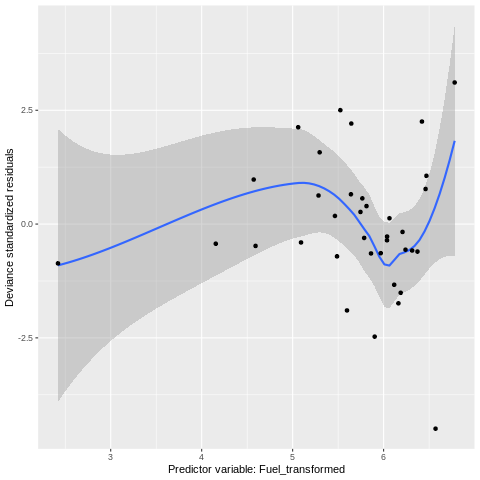

In [106]:
%%R
ggplot(cars_modeled_new, aes(x = Fuel_transformed, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(x = "Predictor variable: Fuel_transformed",
       y = "Deviance standardized residuals")

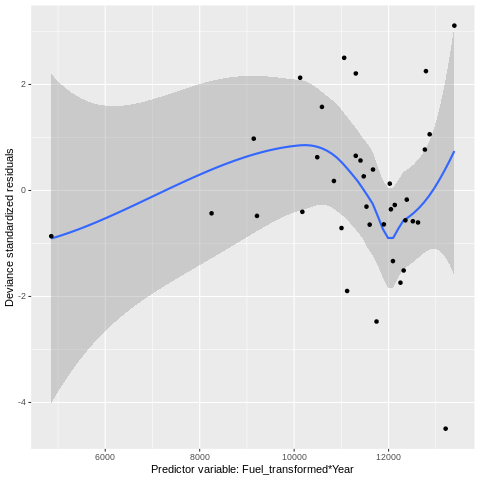

In [107]:
%%R
ggplot(cars_modeled_new, aes(x = Fuel_transformed*Year, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(x = "Predictor variable: Fuel_transformed*Year",
       y = "Deviance standardized residuals")

## Identifying Influential Observations

In [108]:
%%R
im = influence.measures(transformed_model)
names(im)

colSums(im$is.inf)

  dfb.1_ dfb.Year dfb.Cars dfb.Fl_t dfb.Yr:F    dffit    cov.r   cook.d 
       0        0        0        1        1        2        4        1 
     hat 
       1 


In [109]:
%%R
rownames(summary(im))

Potentially influential observations of
	 glm(formula = Deaths ~ Year + Cars + Fuel_transformed + Year:Fuel,      family = poisson, data = cars) :

   dfb.1_ dfb.Year dfb.Cars dfb.Fl_t dfb.Yr:F dffit   cov.r   cook.d  hat    
21  0.61  -0.61     0.61     0.40    -0.95     1.48_*  0.73    0.82    0.29  
22  0.24  -0.24     0.23     0.03    -0.18     0.35    1.60_*  0.05    0.30  
32 -0.01   0.01     0.01     0.17    -0.04    -0.19    1.62_*  0.01    0.28  
53 -0.13   0.13    -0.14     0.47     0.15    -0.54    2.04_*  0.12    0.45_*
56  0.12  -0.12    -0.31    -1.15_*   1.66_*  -2.34_*  0.25_*  1.48_*  0.28  
[1] "21" "22" "32" "53" "56"


In [110]:
%%R
summary(im)
infl = as.numeric(rownames(summary(im)))

Potentially influential observations of
	 glm(formula = Deaths ~ Year + Cars + Fuel_transformed + Year:Fuel,      family = poisson, data = cars) :

   dfb.1_ dfb.Year dfb.Cars dfb.Fl_t dfb.Yr:F dffit   cov.r   cook.d  hat    
21  0.61  -0.61     0.61     0.40    -0.95     1.48_*  0.73    0.82    0.29  
22  0.24  -0.24     0.23     0.03    -0.18     0.35    1.60_*  0.05    0.30  
32 -0.01   0.01     0.01     0.17    -0.04    -0.19    1.62_*  0.01    0.28  
53 -0.13   0.13    -0.14     0.47     0.15    -0.54    2.04_*  0.12    0.45_*
56  0.12  -0.12    -0.31    -1.15_*   1.66_*  -2.34_*  0.25_*  1.48_*  0.28  
Potentially influential observations of
	 glm(formula = Deaths ~ Year + Cars + Fuel_transformed + Year:Fuel,      family = poisson, data = cars) :

   dfb.1_ dfb.Year dfb.Cars dfb.Fl_t dfb.Yr:F dffit   cov.r   cook.d  hat    
21  0.61  -0.61     0.61     0.40    -0.95     1.48_*  0.73    0.82    0.29  
22  0.24  -0.24     0.23     0.03    -0.18     0.35    1.60_*  0.05    0.30  
32

       21        56 
0.8167384 1.4846203 


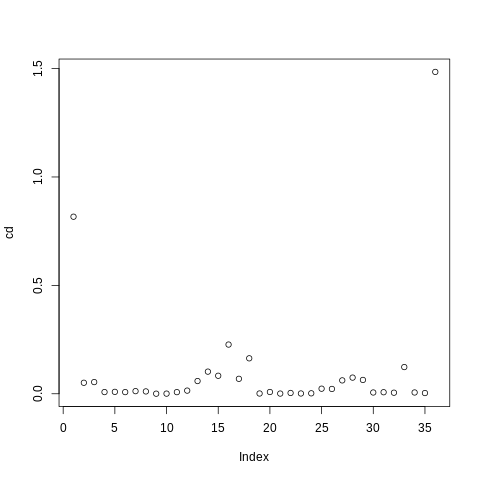

In [111]:
%%R
cd = cooks.distance(transformed_model)
plot(cd)

# Rule of thumb:
n = nrow(cars)  # number of observations
p = 5           # number of parameters
influential = 8/(n - 2*p)
cd[cd > influential]

Two influential observations have been found based on Cook's distance. A new model is trained on data which do not include the rows identified as influential to demonstrate the effect these observations have on the coefficients estimation.

In [112]:
%%R
infl_model = update(transformed_model, subset=(-infl))

coef(transformed_model)
coef(infl_model)

     (Intercept)             Year             Cars Fuel_transformed 
    1.592422e+02    -7.829296e-02     7.862615e-04    -3.991095e-02 
       Year:Fuel 
    3.925265e-08 


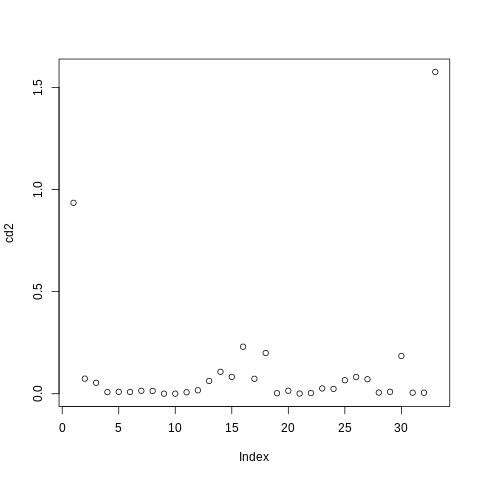

In [113]:
%%R
cd2 = cooks.distance(infl_model)
plot(cd2)

In [114]:
%%R
summary(infl_model)


Call:
glm(formula = Deaths ~ Year + Cars + Fuel_transformed + Year:Fuel, 
    family = poisson, data = cars, subset = (-infl))

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       1.592e+02  9.044e+00  17.608  < 2e-16 ***
Year             -7.829e-02  4.670e-03 -16.764  < 2e-16 ***
Cars              7.863e-04  8.122e-05   9.680  < 2e-16 ***
Fuel_transformed -3.991e-02  9.809e-03  -4.069 4.72e-05 ***
Year:Fuel         3.925e-08  9.937e-09   3.950 7.82e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2304.10  on 32  degrees of freedom
Residual deviance:   63.64  on 28  degrees of freedom
AIC: 349

Number of Fisher Scoring iterations: 4



Since both of the identified observations come from the end of the data frame (observations 33 and 36 out of 36 observations) and can therofore be considered boundary observations, it is not reliable to base the estimations of the model parameters on these values. The lowered number of deaths in the year 2007 and later on could have been caused by a further modernization of the automobile industry or possibly a lower demand based on the ongoing Great Recession. That is why we choose to continue the analysis with the updated model trained of the data without the said observations.

## Prediction

In [115]:
%%R
omit_5 = c(32, 33, 34, 35, 36)

model_omit_5 = update(infl_model, subset=(-omit_5))

cars_predict = cars%>%
  mutate(Fuel_transformed = log(abs(Fuel-mean(Fuel))))

In [116]:
%%R
predicted_deaths = predict(model_omit_5, newdata = cars_predict[omit_5, ])
predicted_deaths

      52       53       54       55       56 
6.184884 6.241543 6.088604 6.027731 5.976053 


In [117]:
%%R
cars$Deaths[omit_5]

[1] 445 471 397 358 266


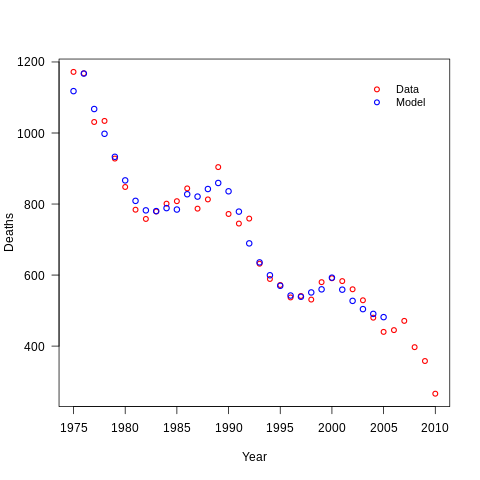

In [118]:
%%R
plot(cars$Deaths ~ cars$Year, col="red", cex=0.9, lwd=1.5,
     xlab = "Year", ylab="Deaths", las=1)
legend("topright", inset = .05, legend = c("Data", "Model"),
       col = c("red", "blue"), bty="n", lwd = 1.5, pch=c(1,1), cex=0.9, lty=c(NA,NA))
points(fitted(model_omit_5) ~ cars$Year[-omit_5], col="blue", lwd=1.5)
points(predicted_deaths ~ cars_predict$Year[omit_5], col="blue", lwd=1.5)

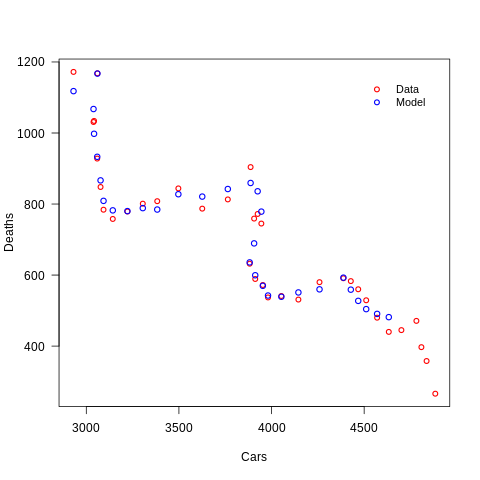

In [119]:
%%R
plot(cars$Deaths ~ cars$Cars, col="red", cex=0.9, lwd=1.5,
     xlab = "Cars", ylab="Deaths", las=1)
legend("topright", inset = .05, legend = c("Data", "Model"),
       col = c("red", "blue"), bty="n", lwd = 1.5, pch=c(1,1), cex=0.9, lty=c(NA,NA))
points(fitted(model_omit_5) ~ cars$Cars[-omit_5], col="blue", lwd=1.5)
points(predicted_deaths ~ cars_predict$Cars[omit_5], col="blue", lwd=1.5)

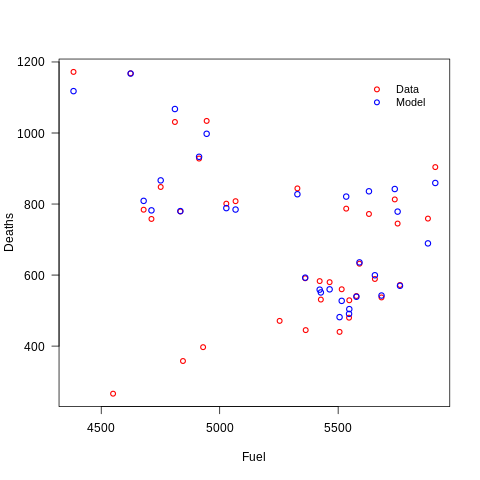

In [120]:
%%R
plot(cars$Deaths ~ cars$Fuel, col="red", cex=0.9, lwd=1.5,
     xlab = "Fuel", ylab="Deaths", las=1)
legend("topright", inset = .05, legend = c("Data", "Model"),
       col = c("red", "blue"), bty="n", lwd = 1.5, pch=c(1,1), cex=0.9, lty=c(NA,NA))
points(predicted_deaths ~ cars_predict$Fuel[omit_5], col="blue", lwd=1.5)
points(fitted(model_omit_5) ~ cars$Fuel[-omit_5], col="blue", lwd=1.5)